
Remplir toutes les cellules où apparaît l'indicateur `YOUR CODE HERE` 
et dans ce cas, **supprimez la ligne `raise NotImplementedError()`**

Remplir également les "YOUR ANSWER HERE", 

ainsi que votre nom prénom ci-dessous

In [1]:
import pandas as pd

NAME = "Antoine Aubert"

---

*Nous sommes à la fin du 16e siècle et vous êtes égaré dans le temps et esclave de l'empire Ottoman.*

*Vous venez de renverser deux sacs de riz qui se sont mélangés au sol. Le sultant est très colérique et très fâché, car il déteste le goût d'un mélange de variétés de riz. Vraiment il déteste ce goût qu'il détecte dès qu'il y a plus de 20% de mélange.*

*De longs supplices et le pal pour terminer vous attendent. Vous disposez d'une machine à remonter dans le temps (pourquoi vous ne l'utilisez pas pour vous échapper est une autre histoire...), qui vous permet de disposer d'un appareil photo et d'un ordinateur. Prenant en photo deux échantillons de riz (dans les sacs non renversés), vous définissez des features et cherchez, grâce à des connaissances acquises lors d'un de vos voyages précédents, à établir un modèle de discrimination des grains de riz qui vous permettrait d'éviter des [perpectives désagréables](https://fr.wikipedia.org/wiki/Supplice_du_pal), [très désagréables](https://fr.wikipedia.org/wiki/Supplice_du_pal#/media/Fichier:Empalement.jpg). Saurez-vous trouver un modèle avec une *accuracy* supérieure à 80% ?*

*(il vous faudra ensuite trier vos grains de riz, mais vous êtes opiniâtre et avez le temps)*

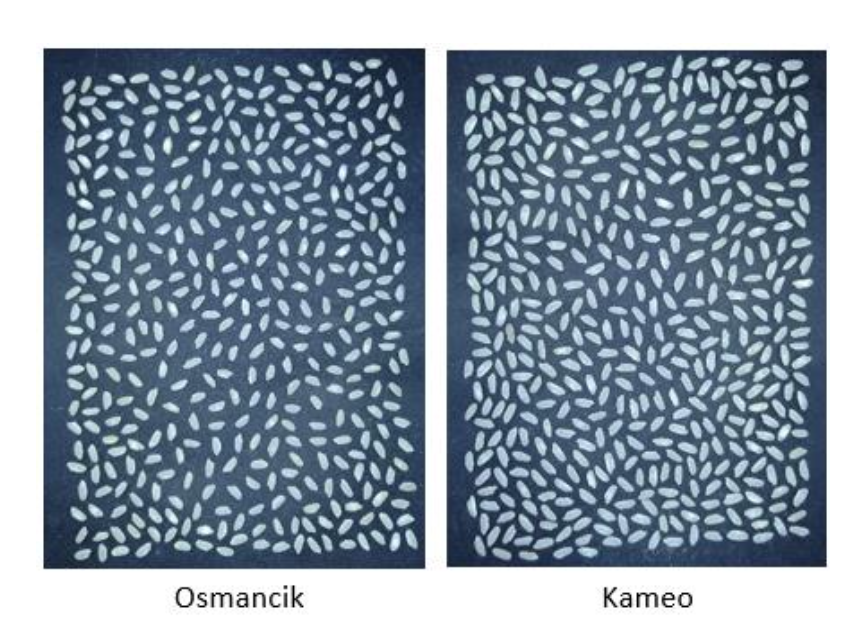

Le problème qui vous est posé devrait vous permettre de mettre en oeuvre différentes méthodes et approches abordées dans les différents cours : préparation des données, encodage, suppression de valeurs aberrantes, remplacement des valeurs non disponibles ; mise en oeuvre de techniques de régression et de dicrimination. 

>Le sujet comporte 3 grandes parties

>1. Lecture et préparation des données (encodage, valeurs aberrantes, remplacement des valeurs manquantes)
>2. [Séparation en train-test]
>3. Régression linéaire
>4. Discrimination

>Ces 3 parties sont indépendantes. Vous pouvez charger le fichier qui correspond aux résultats de la première partie pour poursuivre, si vous coinciez ou désiriez directement passer à la suite. Régression et Discrimination sont indépendantes et peuvent être effectuées dans n'importe quel ordre. 

>Le sujet comporte des tests en ligne (`assert` ; qui vous permettront de contrôler votre progression), et des test cachés qui seront effectués automatiquement sur votre notebook. Vous devrez redre votre notebook sur Blackboard **après l'avoir sauvegardé !** (Fichier/Sauver, File/Save as ou CTRL-S, ou Command-S)

In [3]:
import pandas as pd
import numpy as np

## 1 - Lecture des données

Les données sont contenues dans un fichier `Rice.csv`. Parmi les variables, vous disposerez des variables suivantes :

>**Attribute Information**:
>1. Area: Returns the number of pixels within the boundaries of the rice grain.
>2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
>3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
>4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
>5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
>6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
>7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
>8. Class: Commeo and Osmancik.

Lire le fichier de données dans un dataframe de nom `data` 

In [23]:
# Votre solution ici
data = pd.read_csv('Rice.csv')

Combien présente-t-il d'exemples ? de variables explicatives ? Est-il `tidy`? (dans le cas contraire, le mettre en forme)

In [24]:
# 
Nb_instances = data.shape[0] # Nombre d'exemples
Nb_var = data.shape[1] # Nombre de variables explicatives
Tidy = True # Tidy ou pas : indiquer True ou False

In [7]:
print(Nb_instances, Nb_var)

3810 8


## Valeurs manquantes et aberrantes

### Valeurs manquantes

Ce tableau présente-t-il des valeurs manquantes ? 

In [25]:
# Donner les commandes permettant de lister le nombre de valeurs manquantes pour chaque variable (colonne)
# vous pourrez utiliser la méthode .isnull() et .sum() 
data.isnull().sum()

Area                  7
Perimeter             9
Major_Axis_Length     8
Minor_Axis_Length    11
Eccentricity          4
Convex_Area           6
Extent                7
Class                10
dtype: int64

In [13]:
print(f"Le nombre d'erreurs total est : {data.isnull().sum().sum()}")

Le nombre d'erreurs total est : 62


In [16]:
data.isna().sum()

Area                  7
Perimeter             9
Major_Axis_Length     8
Minor_Axis_Length    11
Eccentricity          4
Convex_Area           6
Extent                7
Class                10
dtype: int64

In [17]:
# Nombre de nans 
Nb_nans_Area = 7
Nb_nans_Perimeter = 9
Nb_nans_Major_Axis_Length = 8
Nb_nans_Minor_Axis_Length = 11
Nb_nans_Eccentricity = 4
Nb_nans_Convex_Area  = 6
Nb_nans_Extent  = 7
Nb_nans_Class  = 10

### Valeurs aberrantes

Tracer les boîtes à moustache (boxplot) des variables (colonnes)  
- Area
- Perimeter
- Eccentricity 
(Utiliser plusieurs cellules si besoin)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Class', ylabel='Area'>

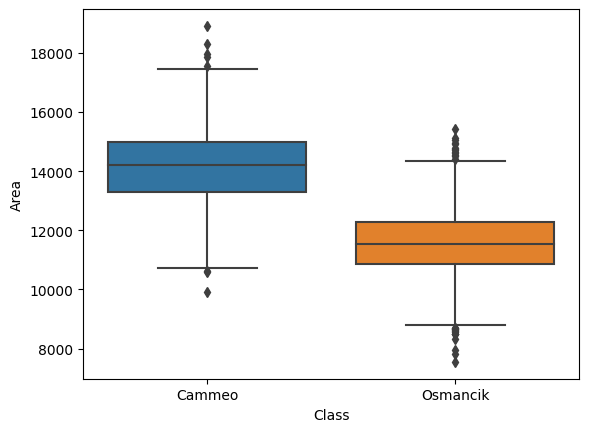

In [19]:
sns.boxplot(x=data["Class"], y=data["Area"])

<Axes: xlabel='Class', ylabel='Perimeter'>

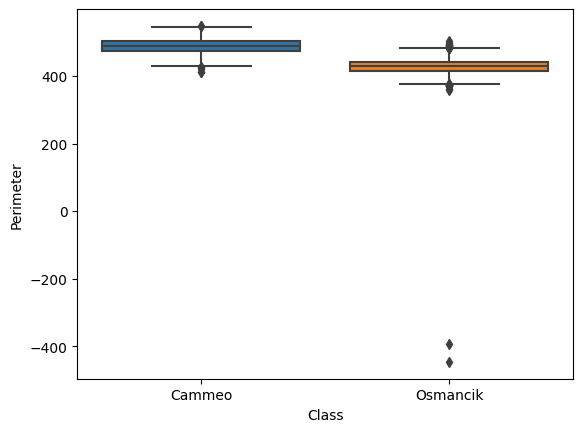

In [20]:
sns.boxplot(x=data["Class"], y=data["Perimeter"])

<Axes: xlabel='Class', ylabel='Eccentricity'>

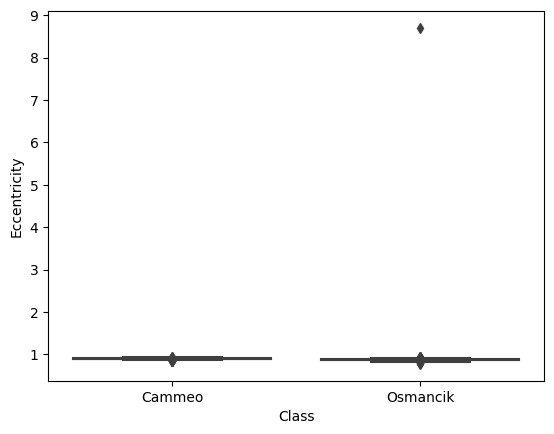

In [21]:
sns.boxplot(x=data["Class"], y=data["Eccentricity"])

Au vu de ces résultats, pouvez-vous soupçonner la présence de valeurs aberrantes ou outliers ? 
- Dans au moins deux des cas ci-dessus, repérez et remplacez les valeurs aberrantes par des nan
- *Indication 1 : il peut y avoir des interprétations logiques qui appuient le fait que certaines valeurs sont aberrantes*
- *Indication 2 : les valeurs aberrantes sont placées dans une des 12 premières lignes du dataframe*

1. pas de valeur aberrante pour sur
2. aberrante pour sur
3. aberrante pour sur

In [22]:
import numpy as np
print("Le nan est encodé par 'np.nan' -->", np.nan)

Le nan est encodé par 'np.nan' --> nan


In [35]:
# Rappel : Votre dataframe doit être nommé "data" 
idx_Eccentricity = data[data["Eccentricity"] > 2 ]
idx_Perimeter    = data[data["Perimeter"] <  0 ]

In [41]:
print(idx_Eccentricity.index)
print(idx_Perimeter.index)

Int64Index([10, 2647], dtype='int64')
Int64Index([3, 18], dtype='int64')


In [42]:
data["Eccentricity"][10] = np.nan
data["Eccentricity"][2647] = np.nan

data["Perimeter"][3] = np.nan
data["Perimeter"][18] = np.nan

C:\Users\antoi\AppData\Local\Temp\ipykernel_22212\1403943958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Eccentricity"][10] = np.nan
C:\Users\antoi\AppData\Local\Temp\ipykernel_22212\1403943958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Eccentricity"][2647] = np.nan
C:\Users\antoi\AppData\Local\Temp\ipykernel_22212\1403943958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Perimeter"][3] = np.nan


In [45]:
data.head(11)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,12181.0,456.937988,194.855164,80.284866,0.911173,12489.0,0.584894,Cammeo
1,11679.0,439.186005,181.426773,83.525658,0.887721,11949.0,0.567493,Osmancik
2,15404.0,509.516998,217.297577,91.397537,0.907242,15696.0,0.633701,Cammeo
3,11748.0,NaN,190.213318,79.889557,0.907524,11926.0,0.809760,Osmancik
4,10241.0,411.946991,167.747681,79.105507,0.881826,10486.0,0.589750,Osmancik
5,12518.0,473.384003,203.922058,80.007668,0.919818,12778.0,0.680326,Cammeo
6,15035.0,506.152008,216.935303,89.389236,0.911159,15432.0,0.609297,Cammeo
7,11898.0,453.980011,195.360046,78.369102,0.916011,12134.0,0.548042,Cammeo
8,13584.0,478.057007,203.836945,85.427422,0.907942,13877.0,0.676326,Cammeo
9,13693.0,474.752014,198.115753,89.031097,0.893336,14050.0,0.597634,Osmancik


### Suppression et imputation de valeurs manquantes

#### Suppression

Par ailleurs, vous avez dû noter que la variable `Class` présente des valeurs manquantes. 
- Supprimer les lignes correspondantes 
- /!\ Supprimer *uniquement* les lignes contenant des NA dans la colonne `Class`, pas dans les autres colonnes

In [64]:
idx = data[data["Class"].isnull()].index.tolist()
# print(idx.index.tolist())

data = data.drop(idx, axis=0)
# Votre dataframe après transformation doit toujours être nommé data

In [65]:
data.isnull().sum()

Area                  7
Perimeter            11
Major_Axis_Length     8
Minor_Axis_Length    11
Eccentricity          5
Convex_Area           6
Extent                7
Class                 0
dtype: int64

In [66]:
assert data.isnull().sum()['Area'] > 0
assert data.isnull().sum()['Minor_Axis_Length'] > 0
assert data.isnull().sum()['Class'] == 0

#### Encodage de Class

La colonne `Class` contient deux catégories. Vous encoderez ces deux catégories en remplaçant 
'Cammeo' par des 0 et 'Osmancik' par les 1. 

In [71]:
# Encodage
encoding = {
    "Cammeo" : 0,
    "Osmancik": 1
}
data["Class"] = data["Class"].replace(encoding)
data.head()
# Votre dataframe après transformation doit toujours être nommé data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,12181.0,456.937988,194.855164,80.284866,0.911173,12489.0,0.584894,0
1,11679.0,439.186005,181.426773,83.525658,0.887721,11949.0,0.567493,1
2,15404.0,509.516998,217.297577,91.397537,0.907242,15696.0,0.633701,0
3,11748.0,NaN,190.213318,79.889557,0.907524,11926.0,0.809760,1
4,10241.0,411.946991,167.747681,79.105507,0.881826,10486.0,0.589750,1


In [72]:
assert data.loc[2, 'Class'] == 0
assert data.loc[3, 'Class'] == 1

#### Imputation

- Charger le fichier `Rice_class_encoded.csv`sous le nom de `data`. 

**Attention** : ce fichier **n'est pas** celui que vous devez trouver à l'issue des étapes précédentes ; ceci pour vous éviter la tentation de l'utiliser pour valider les tests précédents sans avoir fait le travail. C'est une version mélangée aléatoirement que vous devez utiliser pour poursuivre. 

In [73]:
data = pd.read_csv("Rice_class_encoded.csv")
# Votre dataframe après transformation doit toujours être nommé data

In [75]:
assert np.isclose(data.loc[4, 'Eccentricity'], 0.913311, rtol=1e-4)
assert np.isclose(data.loc[3792, 'Extent'], 0.744642198085785, rtol=1e-4)

Pour remplacer les autres valeurs manquantes, nous allons utiliser une imputation par les plus proches voisins. 
Importez `KNNImputer` et utilisez le pour remplacer les valeurs manquantes, en utilisant un nombre de voisin de 5 (paramètre par défaut).

In [76]:
data.dtypes

Area                 float64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area          float64
Extent               float64
Class                  int64
dtype: object

In [77]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3793.000000,3789.000000,3792.000000,3789.000000,3795.000000,3794.000000,3793.000000,3800.000000
mean,12665.614817,454.233847,188.761397,86.299582,0.886872,12950.647074,0.661924,0.572632
std,1730.737982,35.602284,17.449933,5.729155,0.020833,1776.584486,0.077220,0.494762
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11377.000000,426.138000,174.346649,82.716797,0.872438,11626.250000,0.598890,0.000000
50%,12419.000000,448.846008,185.791550,86.418549,0.889033,12706.500000,0.645370,1.000000
75%,13946.000000,483.667999,203.508568,90.116997,0.902636,14280.000000,0.726608,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [78]:
cols = data.columns
from sklearn.impute import KNNImputer
# YOUR CODE HERE
KNN_Reg = KNNImputer(missing_values=np.nan)
KNN_Reg.fit(data)
data = KNN_Reg.transform(data)
# Votre dataframe après transformation doit toujours être nommé data !

In [79]:
data = pd.DataFrame(data=data, columns=cols)

In [80]:
assert np.isclose(data.loc[3, 'Perimeter'],417.692993164063 ,rtol=1e-2)
assert np.isclose(data.loc[10, 'Eccentricity'], 0.818750619888306, rtol=1e-2)

In [82]:
data.isnull().sum().sum()

0

## 2 - Séparation Train - test

Pour les expérimentations qui vont suivre, vous devrez disposer d'une partie des données pour établir vos modèles et d'une autre partie pour tester les performances.
- Séparer vos données `data` en un ensemble `train` comprenant les 2000 premières lignes et un ensemble `test` comprenant les données **suivantes**

In [90]:
print(f"La shape de train est \t: {data.shape}")

La shape de train est 	: (3800, 8)


In [110]:
train   = data[0:2000]
test    = data[2000:]


#train.reset_index(inplace=True)
#test.reset_index(inplace=True)

In [111]:
assert train.shape[0] == 2000

In [112]:
print(f"La shape de train est \t: {train.shape}\nLa shape de test est \t: {test.shape}")

La shape de train est 	: (2000, 8)
La shape de test est 	: (1800, 8)


## 3 - Régression linéaire

Supposons que dans certaines configurations, il puisse nous manquer des valeurs de l'excentricité. Nous allons rechercher à reconstituer ces valeurs potentiellement absentes par une régression liéaire. 

#### Définition Xtrain, ytrain, Xtest, ytest

Vous voulez donc prédire `Eccentricity`. A partir de `train` et `test`, définir les matrices `Xtrain` et `Xtest`, qui contiennent toutes les variables 
- sauf la variable à prédire, 
- sauf la variable `Class`
et les vecteurs `ytrain` et `ytest` correspondants.

In [113]:
train.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [118]:
Xtrain  = train.drop(["Class","Eccentricity"], axis=1)
Xtest   = test.drop(["Class","Eccentricity"], axis=1)

In [120]:
print(f"La shape de Xtrain est \t: {Xtrain.shape}\nLa shape de Xtest est \t: {Xtest.shape}")

La shape de Xtrain est 	: (2000, 6)
La shape de Xtest est 	: (1800, 6)


In [124]:
ytrain  = train["Eccentricity"]
ytest   = test["Eccentricity"]

# Errors

In [125]:
#Ceci vérifie que le travail précédent a été réalisé
assert 'Class' not in Xtest.columns
assert 'Eccentricity' not in Xtrain.columns
assert 'Eccentricity' in ytrain.name
assert np.isclose(Xtest.loc[212, 'Extent'], 0.553685784339905, rtol=1e-4)  

KeyError: 212

>- **Exécuter la cellule suivante, qui charge les fichiers à utiliser dans la suite (et qui sont des versions mélangées) de ce que vous avez pu trouver au-dessus**


In [126]:
Xtrain = pd.read_csv("Xtrain_reg.csv")
Xtest = pd.read_csv("Xtest_reg.csv")
ytrain = pd.read_csv("ytrain_reg.csv").squeeze()
ytest = pd.read_csv("ytest_reg.csv").squeeze()

#### Régression

- Instancier un objet régression linéaire (`LinearRegression` de sklearn, à importer), sous le nom `lr`
- Apprendre le modèle sur les données d'apprentissage `train`
- Calculer les performances (le R2) sur `train` puis sur `test`. Vous nommerez `R2train` et `R2test` les deux scores correspondants.


In [130]:
# Importer, instancier, apprendre
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
# train
lr.fit(Xtrain, ytrain)
ytrain_pred = lr.predict(Xtrain)


#Affichage des coefficients
pd.Series(lr.coef_, index=lr.feature_names_in_)

Area                 0.000010
Perimeter            0.000120
Major_Axis_Length    0.000429
Minor_Axis_Length   -0.004289
Convex_Area         -0.000001
Extent              -0.001155
dtype: float64

In [131]:
assert hasattr(lr, 'coef_') #Vérifie que lr ait été appris..

In [132]:
# test
ytest_pred =lr.predict(Xtest)

In [133]:
R2train = r2_score(ytrain,ytrain_pred)
R2test  = r2_score(ytest,ytest_pred)


#Affichage des coefficients
print("Score sur train : ", R2train)
print("Score sur test : ", R2test)

Score sur train :  0.978282104881106
Score sur test :  0.9793873019074744


In [134]:
assert 'R2train' in locals()
assert 'R2test' in locals()

En réalité, on se souvient que l'excentricité, dans une ellipse, est liée aux longueurs des axes. 
Définir une nouvelle variable, disons 
$$
r = \left(\frac{b}{a}\right)^2
$$
où $b$ et $a$ sont respectivement les longueurs des petit et grand axes de l'ellipse.
- Créer une colonne `'r'` à laquelle vous affecterez le résultat de ce calcul, à la fois pour `Xtrain` et pour `Xtest`. 

In [136]:
Xtrain['r'] = np.power((Xtrain['Minor_Axis_Length']/Xtrain['Major_Axis_Length']),2)
Xtest['r'] = np.power((Xtest['Minor_Axis_Length']/Xtest['Major_Axis_Length']),2)

In [138]:
Xtrain.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Extent,r
0,11309.0,427.657990,176.281464,83.045700,11508.0,0.812428,0.221933
1,11329.0,414.617004,168.913498,86.121758,11540.0,0.784122,0.259954
2,11303.0,423.954987,173.836960,83.376488,11527.0,0.619682,0.230040
3,12345.0,440.196014,180.389374,88.156860,12591.0,0.733686,0.238831
4,12618.0,457.898010,193.815720,83.477356,12851.0,0.582226,0.185507


In [139]:
assert 'r' in Xtest.columns

- Recalculer les performances après l'ajout de cette nouvelle variable

In [140]:
# Importer, instancier, apprendre, calculer les scores
from sklearn.linear_model import LinearRegression

lr_r = LinearRegression()
lr_r.fit(Xtrain, ytrain)
ytrain_pred = lr_r.predict(Xtrain)


R2train = r2_score(ytrain,ytrain_pred)   # A recalculer ci-dessous
R2test  = r2_score(ytest,ytest_pred)

#Affichage des coefficients
print("Score sur train : ", R2train)
print("Score sur test : ", R2test)

Score sur train :  0.9973671431321194
Score sur test :  0.9793873019074744


Pensez-vous que la régression linéaire est nécessaire pour calculer l'excentricité ?

> Si les cellules suivantes devaient poser problème (ipywidgets pas installé par exemple et que vous n'avez pas le temps), répondre avec 
>```
a = True
b = True
>```
**à la place de la cellule présentant les checkbox**.
(et adapter la réponse ; ce n'est pas forcément la bonne !). 

Sinon, cochez les cases convenables !

In [141]:
import ipywidgets as widgets
from ipywidgets import Checkbox
from IPython.display import display

In [142]:
a = Checkbox(description="Oui, car les performances de la régression linéaire sont très bonnes", value=False, 
            layout = widgets.Layout(width='900px'))
b = Checkbox(description="Non, car il existe une formule explicite pour la calculer", value=False,
             layout = widgets.Layout(width='900px'))
display(a, b)

Checkbox(value=False, description='Oui, car les performances de la régression linéaire sont très bonnes', layo…

Checkbox(value=False, description='Non, car il existe une formule explicite pour la calculer', layout=Layout(w…

## 4 - Discrimination

Nous en arrivons donc au bout du problème (et il faut souhaiter que cela fonctionne, sinon le pal). 

#### Définition Xtrain, ytrain, Xtest, ytest

Vous voulez donc prédire `Class`. Comme dans la partie sur la régression, vous devez, à partir de `train` et `test`, définir les matrices `Xtrain` et `Xtest`, qui contiennent toutes les variables 
- sauf la variable à prédire, 
et les vecteurs `ytrain` et `ytest` correspondants. 

In [145]:
Xtrain  = train.drop(["Class"], axis=1)
Xtest   = test.drop(["Class"], axis=1)
ytrain  = train["Class"]
ytest   = test["Class"]

In [146]:
assert 'Class' not in Xtest.columns
assert 'Class' not in Xtrain.columns
assert 'Class' in ytrain.name

>- **Exécuter la cellule suivante, qui charge les fichiers à utiliser dans la suite (et qui sont des versions mélangées) de ce que vous avez pu trouver au-dessus**


In [147]:
Xtrain = pd.read_csv("Xtrain_disc.csv")
Xtest = pd.read_csv("Xtest_disc.csv")
ytrain = pd.read_csv("ytrain_disc.csv").squeeze()
ytest = pd.read_csv("ytest_disc.csv").squeeze()

#### Discrimination

- Instancier un objet discrimination linéaire (`LinearDiscriminantAnalysis` de sklearn.discriminant_analysis, à importer), sous le nom `lda`
- Apprendre le modèle sur les données d'apprentissage `train`


In [148]:
# Définition Xtrain, Xtest et ytrain, ytest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(Xtrain, ytrain)

LinearDiscriminantAnalysis()

- Calculer les prédictions (que vous nommerez `preds`) des classes sur `test` ; puis calculer la matrice de confusion. 
- Toujours sur `test`, calculer l'*accuracy*, le nombre de valeurs correctement classifiées, sur le nombre total de valeurs testées

In [149]:
from sklearn.metrics import confusion_matrix
preds = lda.predict(Xtest)
accuracy = lda.score(Xtest,ytest)
confusion = confusion_matrix(ytest,preds)

In [152]:
print(preds)
print(accuracy)
print()
print(confusion)

[0. 0. 0. ... 1. 0. 1.]
0.9316666666666666

[[ 667   72]
 [  51 1010]]


In [153]:
assert 'preds'  in locals()  # teste si les prédictions ont été calculées 
assert 'accuracy'  in locals()  # teste si accuracy a été définie

Définir ci-dessous le nombre de vrais positifs TP (bien classés dans la classe 1) et le nombre de faux positifs FP
vrais 0 classés improprement comme des 1

In [157]:
TP = confusion[0,0]
FP = confusion[0,1]

print(TP, FP)

667 72


#### Réduction du nombre de variables

On a vu que l'excentricité se déduit des axes de l'ellipse (qui engloberait le grain de riz). Il s'agit d'une mesure importante, mais normalisée (dépendant du rapport de deux variables) ; en complétant cette donnée par une mesure de surface (qui elle dépend directement des dimensions), on pourrait avoir suffisamment d'information pour classifier. Tentons cela...

- Rédéfinir Xtrain et Xtest pour qu'ils ne contiennent plus que les variables `Area` et `Eccentricity`. Puis réapprendre le modèle et tester les performances comme précédemment

In [191]:
Xtrain  = train[["Area", "Eccentricity"]]
Xtest   = test[["Area", "Eccentricity"]]
ytrain  = train["Class"]
ytest   = test["Class"]

In [192]:
print(f"La shape de Xtrain est \t: {Xtrain.shape}\nLa shape de Xtest est \t: {Xtest.shape}")

La shape de Xtrain est 	: (2000, 2)
La shape de Xtest est 	: (1800, 2)


In [193]:
print(f"La shape de ytrain est \t: {ytrain.shape}\nLa shape de ytest est \t: {ytest.shape}")

La shape de ytrain est 	: (2000,)
La shape de ytest est 	: (1800,)


In [194]:
# test du fait que Xtrain ne contienne que 2 colonnes
assert Xtrain.shape[1] == 2

In [195]:
from sklearn.metrics import confusion_matrix
lda_bis = LDA()
lda_bis.fit(Xtrain, ytrain)
preds = lda_bis.predict(Xtest)
confusion = confusion_matrix(ytest,preds)
accuracy = lda_bis.score(Xtest,ytest)



print(accuracy)

0.9316666666666666


In [196]:
preds.shape

(1800,)

In [197]:
assert hasattr(lda_bis, 'coef_') #Vérifie que lda ait été appris..

In [198]:
TP = confusion[0,0]
FP = confusion[0,1]

print(TP, FP)
print(preds)

686 53
[1. 0. 1. ... 0. 1. 0.]


In [199]:
print(lda.coef_)

[[-2.15536368e-03 -1.12187034e+02]]


L'assertion suivante :

>En considérant les valeurs de l'intercept et des coefficients, le test suivant :
>$$
127.5887 -2.154~10^{-3} \times Area - 1.1221~ 10^2 \times Eccentricity > 0
$$
>permet de déterminer la classe des grains de riz 

In [181]:
a = Checkbox(description="est vraie", value=False, 
            layout = widgets.Layout(width='900px'))
b = Checkbox(description="est fausse", value=False,
             layout = widgets.Layout(width='900px'))
display(a, b)

Checkbox(value=False, description='est vraie', layout=Layout(width='900px'))

Checkbox(value=False, description='est fausse', layout=Layout(width='900px'))

C'EST FINI !

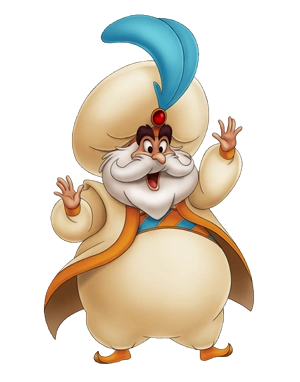

##### **Complément**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


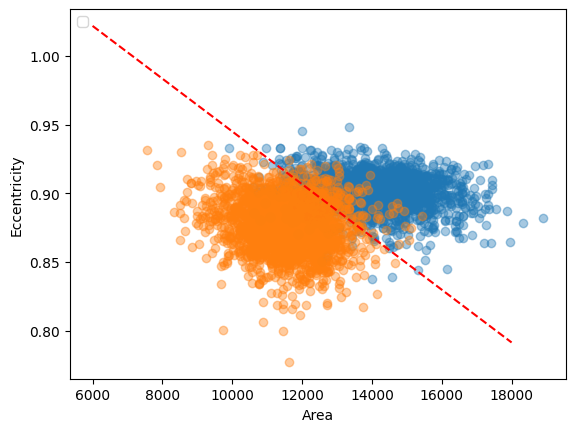

In [182]:
import matplotlib.pyplot as plt
I = data['Class']==0
plt.scatter(data.loc[I, 'Area'],  data.loc[I, 'Eccentricity'],  alpha=0.4)
plt.scatter(data.loc[~I, 'Area'],  data.loc[~I, 'Eccentricity'],  alpha=0.4)
intercept = lda.intercept_
coeffs = lda.coef_[0]
d0 = -intercept / coeffs[1]
d1 = -coeffs[0] / coeffs[1]

plot_sepline = True
if plot_sepline:
    plt.plot(np.array([6000, 18000]), d0 + d1 * np.array([6000, 18000]), '--', color="red")
    plt.xlabel('Area')
    plt.ylabel('Eccentricity')
    _ = plt.legend(loc='upper left')